<a href="https://colab.research.google.com/github/crissstar/projectmanager/blob/main/lotto1083word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from collections import Counter
import random

# lotto1083.CSV 파일에서 데이터를 읽음
df = pd.read_csv('./sample_data/lotto1083.csv', encoding='cp949')
df.reset_index(inplace=True)
# 모든 당첨 번호를 하나의 리스트로 합침
all_numbers = []
for i in range(1, 7):  # 1번째 ~ 6번째 번호까지
    all_numbers.extend(df[str(i) + '번째'].tolist())

# 가장 자주 등장하는 6개의 숫자를 찾음
common_numbers = [item[0] for item in Counter(all_numbers).most_common(6)]
print(f"자주 등장 번호 6개: {common_numbers}")
# 1084회 로또 번호 제시 (5가지 제시)
for i in range(5):
    # 공통 숫자 중 5개를 선택하고 나머지 1개의 숫자는 랜덤으로 선택
    prediction = sorted(common_numbers[:5] + random.sample(set(range(1, 46)) - set(common_numbers), 3))
    print(f"1084회 당첨로또 번호 제시 {i+1}: {prediction}")

자주 등장 번호 6개: [34, 18, 27, 45, 12, 14]
1084회 로또 번호 제시 1: [2, 12, 18, 27, 30, 33, 34, 45]
1084회 로또 번호 제시 2: [12, 18, 25, 27, 34, 36, 40, 45]
1084회 로또 번호 제시 3: [3, 12, 17, 18, 23, 27, 34, 45]
1084회 로또 번호 제시 4: [12, 13, 18, 26, 27, 28, 34, 45]
1084회 로또 번호 제시 5: [12, 18, 27, 29, 34, 35, 43, 45]


<ipython-input-42-27e74b5773f4>:19: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  prediction = sorted(common_numbers[:5] + random.sample(set(range(1, 46)) - set(common_numbers), 3))


자주 등장 번호 6개: [34, 18, 27, 45, 12, 14]
1084회 당첨로또 번호 제시 1: [1, 12, 18, 27, 34, 45]
1084회 당첨로또 번호 제시 2: [9, 12, 18, 27, 34, 45]
1084회 당첨로또 번호 제시 3: [2, 12, 18, 27, 34, 45]
1084회 당첨로또 번호 제시 4: [12, 16, 18, 27, 34, 45]
1084회 당첨로또 번호 제시 5: [12, 18, 27, 30, 34, 45]


<ipython-input-46-bee1d3496e8a>:23: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  prediction = sorted(common_numbers[:5] + random.sample(set(range(1, 46)) - set(common_numbers), 1))


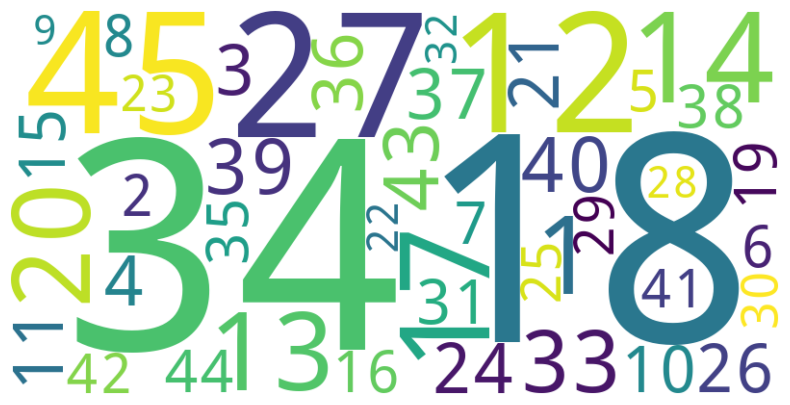

In [46]:
import pandas as pd
from collections import Counter
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# CSV 파일에서 데이터를 읽음
df = pd.read_csv('./sample_data/lotto1083.csv', encoding='cp949')
df.reset_index(inplace=True)

# 모든 당첨 번호를 하나의 리스트로 합침
all_numbers = []
for i in range(1, 7):  # 1번째 ~ 6번째 번호까지
    all_numbers.extend(df[str(i) + '번째'].tolist())

# 가장 자주 등장하는 6개의 숫자를 찾음
common_numbers = [item[0] for item in Counter(all_numbers).most_common(6)]
print(f"자주 등장 번호 6개: {common_numbers}")

# 1084회 로또 번호 제시 (5가지 제시)
for i in range(5):
    # 공통 숫자 중 5개를 선택하고 나머지 1개의 숫자는 랜덤으로 선택
    prediction = sorted(common_numbers[:5] + random.sample(set(range(1, 46)) - set(common_numbers), 1))
    print(f"1084회 당첨로또 번호 제시 {i+1}: {prediction}")

# 번호 빈도수를 계산하고, 키를 문자열로 변환
number_counts = {str(k): v for k, v in Counter(all_numbers).items()}

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(number_counts)

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
!pip install wordcloud

In [19]:
print(df.columns)

Index(['회차', '1번', '2번', '3번', '4번', '5번', '6번', '7번'], dtype='object')


In [22]:
print(df.index)

RangeIndex(start=0, stop=1083, step=1)


In [24]:
df.columns = df.columns.str.strip()

In [25]:
df.loc[:, '회차']

0       1083
1       1082
2       1081
3       1080
4       1079
        ... 
1078       5
1079       4
1080       3
1081       2
1082       1
Name: 회차, Length: 1083, dtype: int64

In [26]:
print(df.head())

     회차  1번  2번  3번  4번  5번  6번  7번
0  1083   3   7  14  15  22  38  17
1  1082  21  26  27  32  34  42  31
2  1081   1   9  16  23  24  38  17
3  1080  13  16  23  31  36  44  38
4  1079   4   8  18  24  37  45   6


In [27]:
print(df.tail())

      회차  1번  2번  3번  4번  5번  6번  7번
1078   5  16  24  29  40  41  42   3
1079   4  14  27  30  31  40  42   2
1080   3  11  16  19  21  27  31  30
1081   2   9  13  21  25  32  42   2
1082   1  10  23  29  33  37  40  16
